# Election Types

## Profile

A ``Profile`` is a collection of linear rankings of a set of candidates. Each linear ranking is represented as a list or tuple of the candidates.  For example, the list ``[2, 1, 0, 3]`` represents the ranking in which candidate 2 is ranked first, 1 is ranked 2nd, 0 is ranked 3rd, and 3 is ranked 4th.  

A ``Profile`` is defined by specifying a list of linear rankings and an optional list of counts of each ranking. Some notes about a ``Profile``:

* The candidates are represented by integers from $0$ to $n-1$, where $n$ is the number of candidates.
* If the ``rcounts`` parameter is not defined, then all rankings are assumed to have a count of 1.

In [1]:
from pref_voting.profiles import Profile

prof = Profile([
    [2, 1, 0, 3], 
    [3, 2, 0, 1], 
    [3, 1, 0, 2]], 
    rcounts=[2, 1, 3])

prof.display()

print(f"\nThere are {prof.num_voters} voters and {prof.num_cands} candidates in the profile.")

print("\nThe rankings in the profile are: ")
for ranking in prof.rankings:
    print(ranking)

print("\nThe ranking types in the profile are: ")
for ranking in prof.ranking_types:
    print(ranking)

print("\nThe rankings with their counts are: ")
for r, c in zip(*prof.rankings_counts):
    print(r,":", c)


+---+---+---+
| 2 | 1 | 3 |
+---+---+---+
| 2 | 3 | 3 |
| 1 | 2 | 1 |
| 0 | 0 | 0 |
| 3 | 1 | 2 |
+---+---+---+

There are 6 voters and 4 candidates in the profile.

The rankings in the profile are: 
(2, 1, 0, 3)
(2, 1, 0, 3)
(3, 2, 0, 1)
(3, 1, 0, 2)
(3, 1, 0, 2)
(3, 1, 0, 2)

The ranking types in the profile are: 
(2, 1, 0, 3)
(3, 1, 0, 2)
(3, 2, 0, 1)

The rankings with their counts are: 
[2 1 0 3] : 2
[3 2 0 1] : 1
[3 1 0 2] : 3


Profiles are created using the ``generate_profile`` function.  There are many probability models available to generate a ``Profile`` object (see [https://pref-voting.readthedocs.io/en/latest/generate_profiles.html](https://pref-voting.readthedocs.io/en/latest/generate_profiles.html) for an overview).  The profile generated by this function can be *anonymized* using the ``anonymize`` method.

In [2]:
from pref_voting.generate_profiles import generate_profile

prof = generate_profile(3, 11)
prof.display()

anon_prof = prof.anonymize()
anon_prof.display()

+---+---+---+---+---+---+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+---+---+---+---+---+---+
| 0 | 0 | 1 | 1 | 1 | 1 | 2 | 1 | 0 | 0 | 1 |
| 2 | 2 | 2 | 2 | 2 | 2 | 0 | 0 | 1 | 2 | 2 |
| 1 | 1 | 0 | 0 | 0 | 0 | 1 | 2 | 2 | 1 | 0 |
+---+---+---+---+---+---+---+---+---+---+---+
+---+---+---+---+---+
| 3 | 5 | 1 | 1 | 1 |
+---+---+---+---+---+
| 0 | 1 | 2 | 1 | 0 |
| 2 | 2 | 0 | 0 | 1 |
| 1 | 0 | 1 | 2 | 2 |
+---+---+---+---+---+


## ProfileWithTies

A ``ProfileWithTies`` allows ballots in which some candidates may be tied or some candidates are not ranked.  Each ballot in a ``ProfileWithTies`` object is a ``Ranking`` object.  A ``Ranking`` is defined by giving a dictionary where the candidates are the keys and the values are the ranks.  


In [3]:
from pref_voting.profiles_with_ties import ProfileWithTies

prof = ProfileWithTies([
    {0:1, 1:1}, 
    {0:1, 1:1, 2:2}, 
    {0:3, 1:1, 2:2},
    {0:1, 3:0, 2:1}, 
], rcounts=[2, 2, 1, 3], 
candidates=[0, 1, 2, 3, 4])

prof.display()

print(f"\nThere are {prof.num_voters} voters and {prof.num_cands} candidates in the profile.")

print("\nThe rankings in the profile are: ")
for ranking in prof.rankings:
    print(ranking)

print("\nThe ranking types in the profile are: ")
for ranking in prof.ranking_types:
    print(f"{ranking}: the type is {type(ranking)}")

print("\nThe rankings with their counts are: ")
for r, c in zip(*prof.rankings_counts):
    print(r,":", c)


+-----+-----+---+-----+
|  2  |  2  | 1 |  3  |
+-----+-----+---+-----+
| 0 1 | 0 1 | 1 |  3  |
|     |  2  | 2 | 0 2 |
|     |     | 0 |     |
|     |     |   |     |
|     |     |   |     |
+-----+-----+---+-----+

There are 8 voters and 5 candidates in the profile.

The rankings in the profile are: 
( 0  1 ) 
( 0  1 ) 
( 0  1 ) 2 
( 0  1 ) 2 
1 2 0 
3 ( 0  2 ) 
3 ( 0  2 ) 
3 ( 0  2 ) 

The ranking types in the profile are: 
( 0  1 ) : the type is <class 'pref_voting.rankings.Ranking'>
( 0  1 ) 2 : the type is <class 'pref_voting.rankings.Ranking'>
1 2 0 : the type is <class 'pref_voting.rankings.Ranking'>
3 ( 0  2 ) : the type is <class 'pref_voting.rankings.Ranking'>

The rankings with their counts are: 
( 0  1 )  : 2
( 0  1 ) 2  : 2
1 2 0  : 1
3 ( 0  2 )  : 3


When working with a ``ProfileWithTies`` object, it is important to understand how unranked candidates are treated:

* Default behavior: By default, any candidate who is not ranked in a profile is ignored when calculating the support of one candidate over another candidate. This means that unranked candidates do not affect any margin calculations.

* Extended behavior: If you prefer to treat unranked candidates as being ranked below all other candidates, you should call the ``use_extended_strict_preference`` method.  

If you want to return to the original behavior where unranked candidates are ignored, you can call the ``use_strict_preference`` method.



In [4]:
prof = ProfileWithTies([
    {0:1, 1:1}, 
    {0:1, 1:1, 2:2}, 
    {0:3, 1:1, 2:2},
    {0:1, 3:0, 2:1}, 
], rcounts=[2, 2, 1, 3], 
candidates=[0, 1, 2, 3, 4])
prof.display()
print()
print(f"The number of voters that rank {0} over {1} is ", prof.support(0, 1))
print(f"The number of voters that rank {1} over {0} is ", prof.support(1, 0))
print(f"{0} is majority preferred to {1} is {prof.majority_prefers(0, 1)}")
print(f"{0} is majority preferred to {4} is {prof.majority_prefers(0, 4)}")
print(f"{4} is majority preferred to {0} is {prof.majority_prefers(4, 4)}")

print()
prof.use_extended_strict_preference()

print(f"After applying use_extended_strict_preference:")
print(f"The number of voters that rank {0} over {1} is ", prof.support(0, 1))
print(f"The number of voters that rank {1} over {0} is ", prof.support(1, 0))
print(f"{0} is majority preferred to {1} is {prof.majority_prefers(0, 1)}")
print(f"{0} is majority preferred to {4} is {prof.majority_prefers(0, 4)}")
print(f"{4} is majority preferred to {0} is {prof.majority_prefers(4, 4)}")

print()
prof.use_strict_preference()

print(f"After applying use_strict_preference:")
print(f"The number of voters that rank {0} over {1} is ", prof.support(0, 1))
print(f"The number of voters that rank {1} over {0} is ", prof.support(1, 0))
print(f"{0} is majority preferred to {1} is {prof.majority_prefers(0, 1)}")
print(f"{0} is majority preferred to {4} is {prof.majority_prefers(0, 4)}")
print(f"{4} is majority preferred to {0} is {prof.majority_prefers(4, 4)}")


+-----+-----+---+-----+
|  2  |  2  | 1 |  3  |
+-----+-----+---+-----+
| 0 1 | 0 1 | 1 |  3  |
|     |  2  | 2 | 0 2 |
|     |     | 0 |     |
|     |     |   |     |
|     |     |   |     |
+-----+-----+---+-----+

The number of voters that rank 0 over 1 is  0
The number of voters that rank 1 over 0 is  1
0 is majority preferred to 1 is False
0 is majority preferred to 4 is False
4 is majority preferred to 0 is False

After applying use_extended_strict_preference:
The number of voters that rank 0 over 1 is  3
The number of voters that rank 1 over 0 is  1
0 is majority preferred to 1 is True
0 is majority preferred to 4 is True
4 is majority preferred to 0 is False

After applying use_strict_preference:
The number of voters that rank 0 over 1 is  0
The number of voters that rank 1 over 0 is  1
0 is majority preferred to 1 is False
0 is majority preferred to 4 is False
4 is majority preferred to 0 is False


We can convert a ``Profile`` object to a ``ProfileWithTies`` object using the ``to_profile_with_ties`` method.  We can also convert a ``ProfileWithTies`` object to a ``Profile`` object using the ``to_linear_profile`` method (this only works when all the candidates are ranked and all the rankings  are linear rankings).

In [5]:
prof = ProfileWithTies([
    {0:1, 1:3, 2:2}, 
    {0:1, 1:3, 2:2},
    {0:1, 1:3, 2:2},
    {0:1, 1:3, 2:2}])

prof.display()
print(type(prof))

lin_prof = prof.to_linear_profile()

lin_prof.display()
print(type(lin_prof))

prof2 = lin_prof.to_profile_with_ties()
prof2.display()
print(type(prof2))

+---+---+---+---+
| 1 | 1 | 1 | 1 |
+---+---+---+---+
| 0 | 0 | 0 | 0 |
| 2 | 2 | 2 | 2 |
| 1 | 1 | 1 | 1 |
+---+---+---+---+
<class 'pref_voting.profiles_with_ties.ProfileWithTies'>
+---+---+---+---+
| 1 | 1 | 1 | 1 |
+---+---+---+---+
| 0 | 0 | 0 | 0 |
| 2 | 2 | 2 | 2 |
| 1 | 1 | 1 | 1 |
+---+---+---+---+
<class 'pref_voting.profiles.Profile'>
+---+---+---+---+
| 1 | 1 | 1 | 1 |
+---+---+---+---+
| 0 | 0 | 0 | 0 |
| 2 | 2 | 2 | 2 |
| 1 | 1 | 1 | 1 |
+---+---+---+---+
<class 'pref_voting.profiles_with_ties.ProfileWithTies'>


## UtilityProfile

A ``UtilityProfile`` is a collection of utility functions, each mapping candidates to real numbers. Each utility function is represented by a ``Utility`` object, which can be defined using a dictionary where the keys are the candidates and the values are their corresponding utility values.


In [6]:
from pref_voting.utility_profiles import UtilityProfile

uprof = UtilityProfile([
    {0:1.0, 1: 0.5, 2: 1.25},
    {0:-0.5, 1: 9.5, 2: 1.05},
    {0:3.0, 1: -2.0, 2: 1.0},
    {0:0.5, 1: 0.0, 2: 3.0},
])

uprof.display()

print(f"\nThere are {uprof.num_voters} voters and {uprof.num_cands} candidates in the profile.")

print("\nThe utility functions in the profile are: ")
for u in uprof.utilities:
    print(u)

print("\nThe average utility of each candidate is: ")
su = uprof.avg_utility_function()
for c in uprof.candidates: 
    print(f"The average utility of candidate {c} is {su(c)}")



  Voter     0     1     2
-------  ----  ----  ----
      1   1     0.5  1.25
      2  -0.5   9.5  1.05
      3   3    -2    1
      4   0.5   0    3

There are 4 voters and 3 candidates in the profile.

The utility functions in the profile are: 
U(0) = 1.0, U(1) = 0.5, U(2) = 1.25
U(0) = -0.5, U(1) = 9.5, U(2) = 1.05
U(0) = 3.0, U(1) = -2.0, U(2) = 1.0
U(0) = 0.5, U(1) = 0.0, U(2) = 3.0

The average utility of each candidate is: 
The average utility of candidate 0 is 1.0
The average utility of candidate 1 is 2.0
The average utility of candidate 2 is 1.575


We can convert each ``UtilityProfile`` into a ``ProfileWithTies`` object using the ``to_profile_with_ties`` method.  


In [7]:
uprof = UtilityProfile([
    {0:1.0, 1: 0.5, 2: 1.25},
    {0:-0.5, 1: 9.5, 2: 1.05},
    {0:3.0, 1: -2.0, 2: 1.0},
    {0:0.5, 1: 0.0, 2: 3.0},
])

print(uprof)
prof = uprof.to_ranking_profile()
prof.display()
print(type(prof))


+---+---+---+---+
| 1 | 1 | 1 | 1 |
+---+---+---+---+
| 2 | 1 | 0 | 2 |
| 0 | 2 | 2 | 0 |
| 1 | 0 | 1 | 1 |
+---+---+---+---+
<class 'pref_voting.profiles_with_ties.ProfileWithTies'>


Given a ``Profile`` object $\mathbf{P}$ we can find a ``UtilityProfile`` object that generates $\mathbf{P}$.  

In [8]:
prof = Profile([
    [2, 1, 0, 3], 
    [3, 2, 0, 1], 
    [3, 1, 0, 2]], 
    rcounts=[2, 1, 3])

prof.display()

uprof = prof.to_utility_profile()
uprof.display()

uprof.to_ranking_profile().anonymize().display()


+---+---+---+
| 2 | 1 | 3 |
+---+---+---+
| 2 | 3 | 3 |
| 1 | 2 | 1 |
| 0 | 0 | 0 |
| 3 | 1 | 2 |
+---+---+---+
  Voter         0         1         2           3
-------  --------  --------  --------  ----------
      1  0.586617  0.652732  0.799718  0.299552
      2  0.544714  0.906125  0.975159  0.00582215
      3  0.381133  0.33051   0.454962  0.840987
      4  0.400684  0.485423  0.331408  0.87559
      5  0.745461  0.849124  0.214824  0.853449
      6  0.50355   0.518373  0.465578  0.912718
+---+---+---+
| 2 | 1 | 3 |
+---+---+---+
| 2 | 3 | 3 |
| 1 | 2 | 1 |
| 0 | 0 | 0 |
| 3 | 1 | 2 |
+---+---+---+


## MarginGraph

A ``MarginGraph`` is a directed graph where the nodes represent the candidates.  There is an edge from candidate $a$ to candidate $b$ with weight $w$ when the **margin** of $a$ over $b$ is $w$ (the number of voters that rank $a$ above $b$ minus the number that rank $b$ above $a$).  

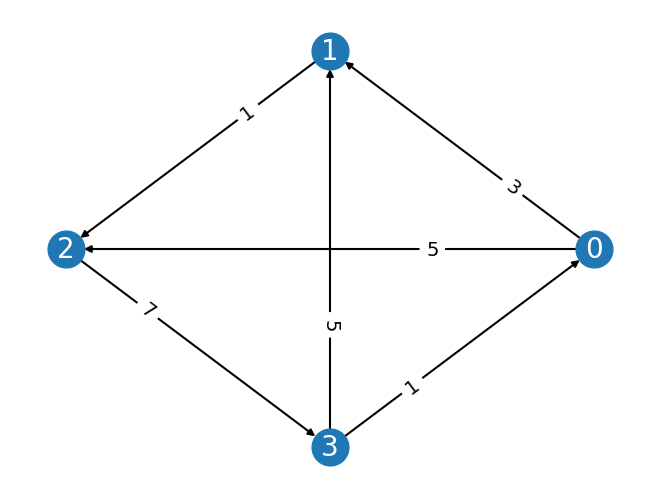

In [9]:
from pref_voting.weighted_majority_graphs import MarginGraph

mg = MarginGraph(
    [0, 1, 2, 3],
    [
        (0, 1, 3), 
        (1, 2, 1), 
        (0, 2, 5),
        (3, 0, 1), 
        (3, 1, 5),
        (2, 3, 7)
        ])

mg.display()


Both ``Profile`` and ``ProfileWithTies`` can be converted to a ``MarginGraph`` object using the ``margin_graph`` method. 

+---+---+---+
| 2 | 2 | 3 |
+---+---+---+
| 2 | 3 | 3 |
| 1 | 2 | 1 |
| 0 | 0 | 0 |
| 3 | 1 | 2 |
+---+---+---+


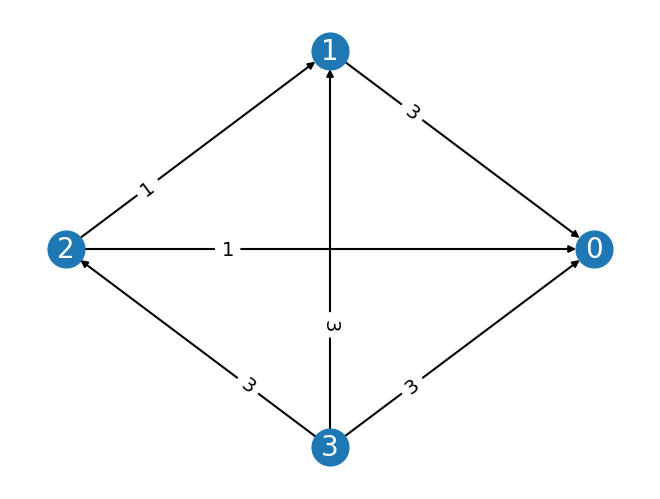

In [10]:
prof = Profile([
    [2, 1, 0, 3], 
    [3, 2, 0, 1], 
    [3, 1, 0, 2]], 
    rcounts=[2, 2, 3])

prof.display()

mg = prof.margin_graph() # the same syntax works for a ProfileWithTies object

mg.display()

# alternatively, prof.display_margin_graph()

Given a margin graph $\mathcal{M}$.  If all the weights are the same parity and if there is no edge between $a$ and $b$, then all the weights are even, then Debord's Theorem says that there is a profile $\mathbf{P}$ that generates the margin graph $\mathcal{M}$.  The method ``debord_profile`` uses the approach from Debord's proof to find a profile that generate $\mathcal{M}$.  The method ``minimal_profile`` uses a linear program to find the minimal profile (in terms of the number of voters) that generates $\mathbf{P}$. 

In [11]:
mg = MarginGraph(
    [0, 1, 2, 3],
    [ 
        (0, 1, 3), 
        (1, 2, 1), 
        (0, 2, 5),
        (3, 0, 1), 
        (3, 1, 5),
        (2, 3, 7)
    ])

print("The Debord profile: ")
debord_prof = mg.debord_profile()
debord_prof.display()
print("The margin graphs are equal:", mg == debord_prof.margin_graph()) # True
print()
min_prof = mg.minimal_profile()
min_prof.display()
print("The margin graphs are equal:", mg == min_prof.margin_graph()) # True


The Debord profile: 
+---+---+---+---+---+---+---+---+---+---+---+
| 1 | 1 | 2 | 2 | 3 | 3 | 1 | 1 | 3 | 3 | 1 |
+---+---+---+---+---+---+---+---+---+---+---+
| 0 | 3 | 0 | 3 | 2 | 1 | 3 | 2 | 3 | 2 | 0 |
| 1 | 2 | 2 | 1 | 3 | 0 | 0 | 1 | 1 | 0 | 1 |
| 2 | 0 | 1 | 0 | 0 | 2 | 1 | 3 | 0 | 3 | 2 |
| 3 | 1 | 3 | 2 | 1 | 3 | 2 | 0 | 2 | 1 | 3 |
+---+---+---+---+---+---+---+---+---+---+---+
The margin graphs are equal: True

+---+---+---+---+
| 6 | 4 | 2 | 1 |
+---+---+---+---+
| 0 | 1 | 3 | 3 |
| 2 | 2 | 0 | 1 |
| 3 | 3 | 1 | 0 |
| 1 | 0 | 2 | 2 |
+---+---+---+---+
The margin graphs are equal: True


## GradeProfile

A ``GradeProfile`` is a collection of ballots that represent the grades that each voter gives to each candidate.   

In [13]:
from pref_voting.grade_profiles import GradeProfile

gprof = GradeProfile([
    {0:1, 1:3, 2:3},
    {0:3, 1:2, 2:1},
    {0:1, 1:1, 2:1},
],
gcounts=[1, 2, 1],
grades=[0, 1, 2, 3])

gprof.display()

print(f"\nThere are {gprof.num_voters} voters and {gprof.num_cands} candidates in the profile.")

print(f"\nThe grades in the profile are: {gprof.grades}") 

print("The grade functions in the profile are:")
for grade_fn in gprof.grade_functions:
    print(grade_fn)

print("\nThe average and median grade of each candidate is: ")

for c in gprof.candidates: 
    print(f"The average grade of candidate {c} is {gprof.avg(c)}")
    print(f"The sum of the  grades of candidate {c} is {gprof.sum(c)}")
    print(f"The median grade of candidate {c} is {gprof.median(c)}")
    print(f"The maximum grade of candidate {c} is {gprof.max(c)}")
    print(f"The minimum grade of candidate {c} is {gprof.min(c)}")
    print()

print("When displaying a GradeProfile, you can also show the average and median grades of each candidate.\n")
gprof.display(show_totals=True)



      1    2    1
--  ---  ---  ---
 0    1    3    1
 1    3    2    1
 2    3    1    1

There are 4 voters and 3 candidates in the profile.

The grades in the profile are: [0, 1, 2, 3]
The grade functions in the profile are:
grade(0) = 1, grade(1) = 3, grade(2) = 3
grade(0) = 3, grade(1) = 2, grade(2) = 1
grade(0) = 3, grade(1) = 2, grade(2) = 1
grade(0) = 1, grade(1) = 1, grade(2) = 1

The average and median grade of each candidate is: 
The average grade of candidate 0 is 2.0
The sum of the  grades of candidate 0 is 8
The median grade of candidate 0 is 1
The maximum grade of candidate 0 is 3
The minimum grade of candidate 0 is 1

The average grade of candidate 1 is 2.0
The sum of the  grades of candidate 1 is 8
The median grade of candidate 1 is 2
The maximum grade of candidate 1 is 3
The minimum grade of candidate 1 is 1

The average grade of candidate 2 is 1.5
The sum of the  grades of candidate 2 is 6
The median grade of candidate 2 is 1
The maximum grade of candidate 2 is 3
The

Each ``GradeProfile`` can be converted to a ``ProfileWithTies`` object using the ``to_ranking_profile`` method.

In [14]:
gprof = GradeProfile([
    {0:1, 1:3, 2:3},
    {0:3, 1:2, 2:1},
    {0:1, 1:1, 2:1},
],
gcounts=[1, 2, 1],
grades=[0, 1, 2, 3])
gprof.display()

gprof.to_ranking_profile().display()

      1    2    1
--  ---  ---  ---
 0    1    3    1
 1    3    2    1
 2    3    1    1
+-----+---+-------+
|  1  | 2 |   1   |
+-----+---+-------+
| 1 2 | 0 | 0 1 2 |
|  0  | 1 |       |
|     | 2 |       |
+-----+---+-------+


## SpatialProfile

A ``SpatialProfile`` assigns to each candidate and each voter an element of $\mathbb{R}^n$.   

Candidates: 
Candidate  0  position:  (0, 0)
Candidate  1  position:  (1, 1)
Candidate  2  position:  (-1, -1)

Voters: 
Voter  0  position:  (0, 1.5)
Voter  1  position:  (-1.25, 0.5)
Voter  2  position:  (0.75, 0.1)
Voter  3  position:  (0, -1)
Voter  4  position:  (1.25, -0.5)
Voter  5  position:  (-0.75, -0.1)
Voter  6  position:  (-0.5, 0.5)

There are 7 voters and 3 candidates in the profile.

The number of dimensions in the profile is 2.


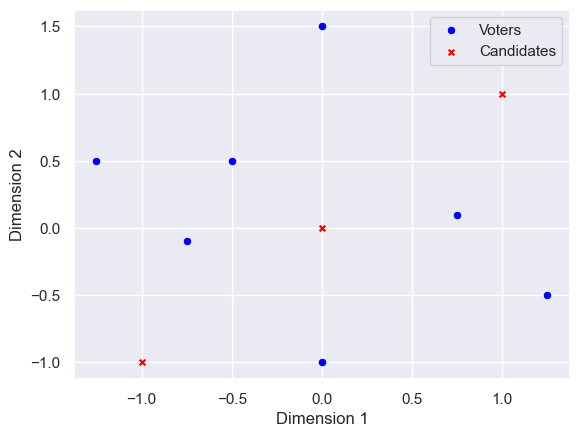

In [15]:
from pref_voting.spatial_profiles import SpatialProfile

sprof = SpatialProfile(
    cand_pos={0:(0, 0), 1: (1, 1), 2:(-1, -1)},
    voter_pos={
        0:(0, 1.5), 
        1:(-1.25, 0.5), 
        2:(0.75, 0.1), 
        3:(0, -1),
        4:(1.25, -0.5),
        5:(-0.75, -0.1),
        6:(-0.5, 0.5),
        })

sprof.display()

print(f"\nThere are {sprof.num_voters} voters and {sprof.num_cands} candidates in the profile.")

print(f"\nThe number of dimensions in the profile is {sprof.num_dims}.")
sprof.view()

A  ``SpatialProfile`` object can be generated using the ``generate_spatial_profile`` function.

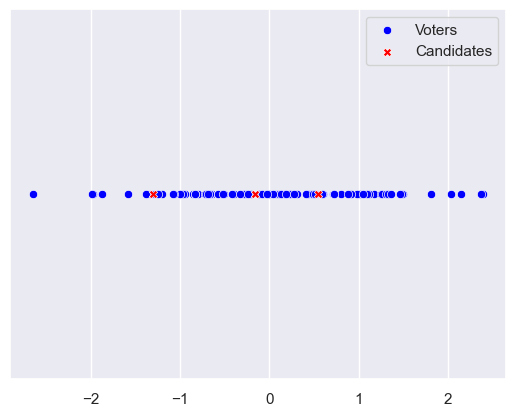

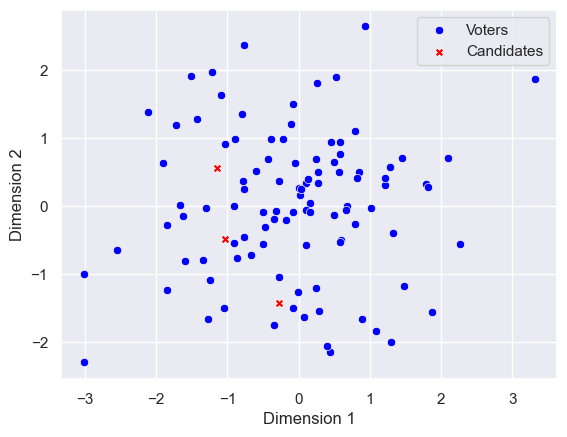

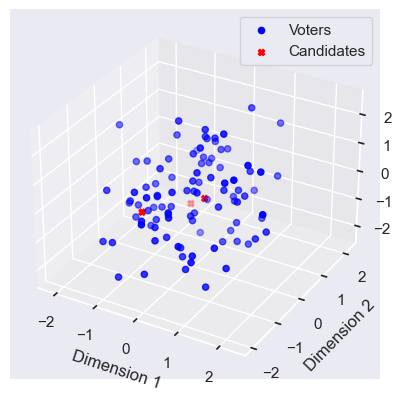

Candidates: 
Candidate  0  position:  [0.21027318 1.60405887 0.03237963 1.91874716]
Candidate  1  position:  [ 1.1819759  -0.11350519  1.569469   -0.21772416]
Candidate  2  position:  [-1.30946959  0.35542689  0.21061518 -0.38896333]

Voters: 
Voter  0  position:  [-1.14341214 -0.46314725  0.2447081   0.72620942]
Voter  1  position:  [-0.14067695 -1.87058493 -0.26541006 -0.01028367]
Voter  2  position:  [-0.7093457   0.38450591 -0.26582505 -2.7337612 ]
Voter  3  position:  [-0.52958474 -0.31081433 -1.63962229  0.72066326]
Voter  4  position:  [0.11581285 1.08241635 0.4335524  1.1651302 ]
Voter  5  position:  [-0.77879369 -0.82226703 -0.52610212  0.29433864]
Voter  6  position:  [0.64990542 0.35895833 0.21601493 2.34986952]
Voter  7  position:  [ 1.56455044 -1.15036568 -0.08633688  0.7246017 ]
Voter  8  position:  [ 0.27201527 -0.88456689 -1.4811473  -0.83786796]
Voter  9  position:  [-0.76000564  1.83613271 -0.26103098  0.33954618]


In [16]:
from pref_voting.generate_spatial_profiles import generate_spatial_profile, generate_spatial_profile_polarized, generate_covariance


sprof = generate_spatial_profile(3, 100, num_dims=1)
sprof.view()

sprof = generate_spatial_profile(3, 100, num_dims=2)
sprof.view()

sprof = generate_spatial_profile(3, 100, num_dims=3)
sprof.view()

sprof = generate_spatial_profile(3, 10, num_dims=4)
sprof.display()


Polarized ``SpatialProfile`` objects can be generated using the ``generate_polarized_spatial_profile`` function by specifying candidate and voter clusters. See [https://pref-voting.readthedocs.io/en/latest/generate_spatial_profiles.html#generate-spatial-profiles-polarized](https://pref-voting.readthedocs.io/en/latest/generate_spatial_profiles.html#generate-spatial-profiles-polarized) for details.

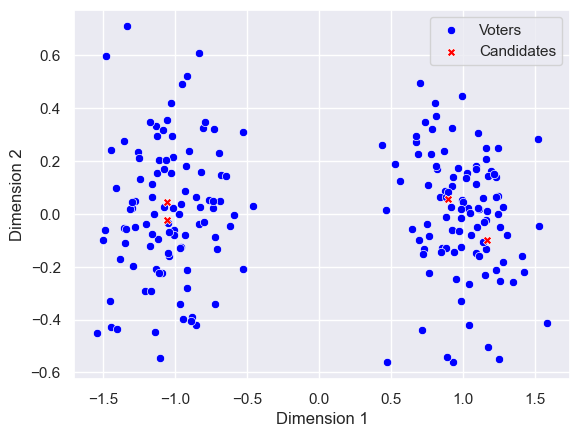

In [17]:
from pref_voting.generate_spatial_profiles import generate_spatial_profile_polarized, generate_covariance

sprof = generate_spatial_profile_polarized(
    [((-1, 0), generate_covariance(2, 0.1, 0), 2),
     ((1, 0), generate_covariance(2, 0.1, 0), 2),
    ],
    [((-1, 0), generate_covariance(2, 0.25, 0), 100),
     ((1, 0), generate_covariance(2, 0.25, 0), 100),
    ],
)
sprof.view()

A ``SpatialProfile`` can be transformed into a ``UtilityProfile`` by applying different utility functions. Each voter assigns utilities to the candidates based on the positions of both the voter and the candidates.  See [https://pref-voting.readthedocs.io/en/latest/spatial_profiles.html#utility-functions](https://pref-voting.readthedocs.io/en/latest/spatial_profiles.html#utility-functions) for explanations of the different utility functions.



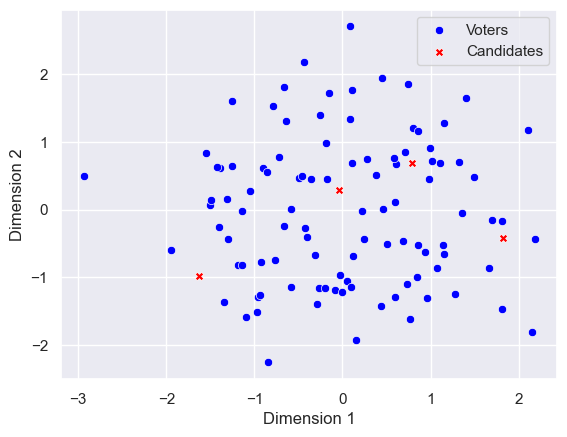

Using the linear utility function:
+----+----+----+---+----+---+---+----+---+---+---+---+---+
| 11 | 20 | 20 | 6 | 13 | 6 | 1 | 12 | 4 | 1 | 3 | 1 | 3 |
+----+----+----+---+----+---+---+----+---+---+---+---+---+
| 3  | 0  | 1  | 2 | 3  | 3 | 0 | 2  | 3 | 3 | 1 | 2 | 0 |
| 1  | 3  | 3  | 3 | 0  | 0 | 3 | 0  | 1 | 2 | 3 | 3 | 2 |
| 0  | 2  | 0  | 0 | 1  | 2 | 1 | 3  | 2 | 0 | 2 | 1 | 3 |
| 2  | 1  | 2  | 1 | 2  | 1 | 2 | 1  | 0 | 1 | 0 | 0 | 1 |
+----+----+----+---+----+---+---+----+---+---+---+---+---+
Using the quadratic utility function:
+----+----+----+---+----+---+---+----+---+---+---+---+---+
| 11 | 20 | 20 | 6 | 13 | 6 | 1 | 12 | 4 | 1 | 3 | 1 | 3 |
+----+----+----+---+----+---+---+----+---+---+---+---+---+
| 3  | 0  | 1  | 2 | 3  | 3 | 0 | 2  | 3 | 3 | 1 | 2 | 0 |
| 1  | 3  | 3  | 3 | 0  | 0 | 3 | 0  | 1 | 2 | 3 | 3 | 2 |
| 0  | 2  | 0  | 0 | 1  | 2 | 1 | 3  | 2 | 0 | 2 | 1 | 3 |
| 2  | 1  | 2  | 1 | 2  | 1 | 2 | 1  | 0 | 1 | 0 | 0 | 1 |
+----+----+----+---+----+---+---+----+---+

In [18]:
from pref_voting.utility_functions import *
from pref_voting.generate_spatial_profiles import generate_spatial_profile

sprof = generate_spatial_profile(4, 101, 2)
sprof.view()

print("Using the linear utility function:")
uprof = sprof.to_utility_profile(utility_function=linear_utility)
uprof.to_ranking_profile().anonymize().display()

print("Using the quadratic utility function:")
uprof = sprof.to_utility_profile(utility_function=quadratic_utility)
uprof.to_ranking_profile().anonymize().display()

print("Using the RM utility function:")
uprof = sprof.to_utility_profile(utility_function=rm_utility)
uprof.to_ranking_profile().anonymize().display()

print("Using the mixed RM utility function:")
uprof = sprof.to_utility_profile(utility_function=mixed_rm_utility)
uprof.to_ranking_profile().anonymize().display()


print("Using the Matthews utility function:")
uprof = sprof.to_utility_profile(utility_function=matthews_utility)
uprof.to_ranking_profile().anonymize().display()

print("Using the Shepsle utility function:")
uprof = sprof.to_utility_profile(utility_function=shepsle_utility)
uprof.to_ranking_profile().anonymize().display()

print("Using the city block utility function:")
uprof = sprof.to_utility_profile(utility_function=city_block_utility)
uprof.to_ranking_profile().anonymize().display()

